In [1]:
import cv2
import json
import numpy as np
from collections import defaultdict

NUM_IMGS = 21

### Read annttotations acnd create polygon masks

In [5]:
with open(r"instances_default.json", encoding="utf-8") as file:
    gt = json.load(file)

im_anns_gt = defaultdict(list)
for ann in gt["annotations"]:
    im_anns_gt[ann["image_id"]].append(ann)

gt_mask = np.zeros((NUM_IMGS,26,512,512), np.int32)
for id, im in im_anns_gt.items():
    for ann in im:
        points = np.array([ann["segmentation"][0][::2], ann["segmentation"][0][1::2]], np.int32).T
        points = points.reshape((-1, 1, 2))
        tmp = np.zeros((512,512), np.int32)
        cv2.fillPoly(tmp, [points], (1))
        gt_mask[id, ann["category_id"]] += tmp
        gt_mask[id, ann["category_id"], gt_mask[id, ann["category_id"]]>0] = 1

### Test the result

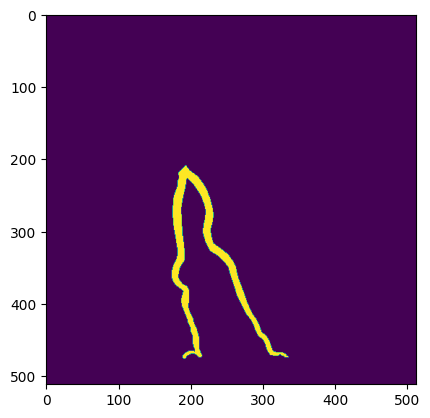

In [6]:
import matplotlib.pyplot as plt
plt.imshow(gt_mask[2,17])
plt.show()